<a href="https://colab.research.google.com/github/dittmanndiogo/nlp_model/blob/main/trabalho_nlp_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importações

In [3]:
import glob
import pandas as pd
import os
import re
from google.colab import files
import nltk
from nltk.corpus import stopwords
import string

# Baixar os recursos necessários do NLTK
nltk.download('stopwords')

import re
!pip install unidecode
from unidecode import unidecode

!git clone https://github.com/roneysco/Fake.br-Corpus.git

!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.0 MB/s eta 0:00:00
Cloning into 'Fake.br-Corpus'...
remote: Enumerating objects: 28763, done.
remote: Total 28763 (delta 0), reused 0 (delta 0), pack-reused 28763
Receiving objects: 100% (28763/28763), 37.10 MiB | 18.67 MiB/s, done.
Resolving deltas: 100% (14129/14129), done.
Updating files: 100% (21602/21602), done.
Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0
Receiving objects: 100% (34/34), 1.27 MiB | 14.99 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [4]:
!ls Fake.br-Corpus

full_texts  preprocessed  README.md  size_normalized_texts


In [5]:
%cd Fake.br-Corpus/full_texts
!ls


/content/Fake.br-Corpus/full_texts
fake  fake-meta-information  true  true-meta-information


###Processamento - Fake e Fake meta

In [6]:
current_folder = 'fake'

folder_path = current_folder

file_list = glob.glob(f'{folder_path}/*.txt')

for file_path in file_list:
    print(file_path)


fake/1130.txt
fake/2328.txt
fake/1999.txt
fake/2592.txt
fake/1447.txt
fake/1506.txt
fake/569.txt
fake/2767.txt
fake/3504.txt
fake/2941.txt
fake/1379.txt
fake/455.txt
fake/3518.txt
fake/2611.txt
fake/2995.txt
fake/2127.txt
fake/2819.txt
fake/1983.txt
fake/3297.txt
fake/942.txt
fake/828.txt
fake/11.txt
fake/1941.txt
fake/3545.txt
fake/200.txt
fake/190.txt
fake/2463.txt
fake/551.txt
fake/381.txt
fake/2254.txt
fake/2619.txt
fake/1003.txt
fake/657.txt
fake/3115.txt
fake/2888.txt
fake/537.txt
fake/3427.txt
fake/446.txt
fake/1795.txt
fake/1512.txt
fake/1697.txt
fake/2554.txt
fake/856.txt
fake/556.txt
fake/2786.txt
fake/3271.txt
fake/2690.txt
fake/1386.txt
fake/2362.txt
fake/3573.txt
fake/3295.txt
fake/3495.txt
fake/3223.txt
fake/1558.txt
fake/2395.txt
fake/1584.txt
fake/2052.txt
fake/1182.txt
fake/2890.txt
fake/2474.txt
fake/1914.txt
fake/1405.txt
fake/2090.txt
fake/3348.txt
fake/3089.txt
fake/1456.txt
fake/1510.txt
fake/710.txt
fake/2876.txt
fake/1501.txt
fake/119.txt
fake/2155.txt
fake/3536

In [7]:
current_folder = 'fake-meta-information'

folder_path = current_folder

# Lista de arquivos dentro da pasta "fake-meta-information"
file_list = glob.glob(f'{folder_path}/*.txt')

meta_data = []

file_numbers = []

# Percorrendo os arquivos na pasta "fake-meta-information"
for file_path in file_list:
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        # Removendo espaços em branco e quebras de linha
        lines = [line.strip() for line in lines]

        meta_data.append(lines)

        file_numbers.append(re.search(r'(\d+)', os.path.basename(file_path)).group(1))

# Definindo as colunas do DataFrame
columns = [
    'author', 'link', 'category', 'date_of_publication', 'number_of_tokens',
    'number_of_words_without_punctuation', 'number_of_types', 'number_of_links_inside_the_news',
    'number_of_words_in_upper_case', 'number_of_verbs', 'number_of_subjuntive_and_imperative_verbs',
    'number_of_nouns', 'number_of_adjectives', 'number_of_adverbs', 'number_of_modal_verbs',
    'number_of_singular_first_and_second_personal_pronouns', 'number_of_plural_first_personal_pronouns',
    'number_of_pronouns', 'pausality', 'number_of_characters', 'average_sentence_length',
    'average_word_length', 'percentage_of_news_with_spelling_errors', 'emotiveness', 'diversity'
]


meta_df = pd.DataFrame(meta_data, columns=columns)

meta_df['file_number'] = file_numbers

meta_df['id'] = meta_df['file_number'] + '-FAKE'

meta_df['tag'] = 'FAKE'



In [8]:
current_folder = 'fake'

folder_path = current_folder

file_list = glob.glob(f'{folder_path}/*.txt')

fake_text_data = []

file_numbers = []

for file_path in file_list:
    try:
        # Ler o conteúdo do arquivo
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()

        # Adicionar o conteúdo à lista de dados
        fake_text_data.append({'full_text': file_content})

        # Adicionar o número do arquivo à lista de números de arquivos
        file_numbers.append(re.search(r'(\d+)', os.path.basename(file_path)).group(1))
    except Exception as e:
        print(f"Erro ao ler o arquivo {file_path}: {str(e)}")

fake_text_df = pd.DataFrame(fake_text_data)

fake_text_df['file_number'] = file_numbers

print(fake_text_df.head())


                                           full_text file_number
0  Napoleão, a ira do profeta e o envelope amarel...        1130
1  Promotor de justiça defende que população faça...        2328
2  Estádio do Manchester City (na Inglaterra) é e...        1999
3  Deputado se irrita e chama Gleisi Hoffmann de ...        2592
4  Advogado que protagonizou bate-boca com Sérgio...        1447


In [9]:
# Juntar os DataFrames usando a coluna 'file_number' como chave de junção
fake_merged = pd.merge(meta_df, fake_text_df, on='file_number', how='inner')

# Visualizar as primeiras linhas do DataFrame resultante
display(fake_merged.head())

,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,number_of_words_in_upper_case,number_of_verbs,...,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_spelling_errors,emotiveness,diversity,file_number,id,tag,full_text
0,None,https://www.diariodobrasil.org/empregar-as-ffa...,politica,24/09/2017,374,332,218,0,5,56,...,1664,30.1818,5.01205,0.0,0.323308,0.656627,707,707-FAKE,FAKE,Empregar as FFAA no RJ sem dar autonomia a nos...
1,None,https://www.diariodobrasil.org/planalto-confir...,politica,16/03/2016,130,117,78,0,0,19,...,565,14.625,4.82906,0.0,0.137931,0.666667,3093,3093-FAKE,FAKE,Planalto confirma a vergonha nacional: Ex-pres...
2,None,https://www.diariodobrasil.org/banda-guns-n-ro...,tv_celebridades,30/11/2016,96,82,63,2,2,7,...,378,20.5,4.60976,0.0243902,0.108108,0.768293,1896,1896-FAKE,FAKE,"Banda Guns N"" Roses faz homenagem ao time da C..."
3,None,https://www.diariodobrasil.org/ele-contou-que-...,tv_celebridades,17/02/2017,296,247,142,1,2,39,...,1155,16.4667,4.67611,0.0,0.114035,0.574899,1549,1549-FAKE,FAKE,Ele contou que entregou propina a pedido de um...
4,None,https://www.diariodobrasil.org/malafaia-manda-...,tv_celebridades,16/12/2015,254,213,124,0,2,41,...,1005,14.2,4.71831,0.00469484,0.196078,0.58216,3393,3393-FAKE,FAKE,"Malafaia manda recado para Lula: ""Quando o hom..."


In [10]:
# Pasta atual
current_folder = 'true'

# Caminho para a pasta atual
folder_path = current_folder

# Lista de arquivos dentro da pasta "fake"
file_list = glob.glob(f'{folder_path}/*.txt')

# Imprimir os nomes dos arquivos
for file_path in file_list:
    print(file_path)


true/1130.txt
true/2328.txt
true/1999.txt
true/2592.txt
true/1447.txt
true/1506.txt
true/569.txt
true/2767.txt
true/3504.txt
true/2941.txt
true/1379.txt
true/455.txt
true/3518.txt
true/2611.txt
true/2995.txt
true/2127.txt
true/2819.txt
true/1983.txt
true/3297.txt
true/942.txt
true/828.txt
true/11.txt
true/1941.txt
true/3545.txt
true/200.txt
true/190.txt
true/2463.txt
true/551.txt
true/381.txt
true/2254.txt
true/2619.txt
true/1003.txt
true/657.txt
true/3115.txt
true/2888.txt
true/537.txt
true/3427.txt
true/446.txt
true/1795.txt
true/1512.txt
true/1697.txt
true/2554.txt
true/856.txt
true/556.txt
true/2786.txt
true/3271.txt
true/2690.txt
true/1386.txt
true/2362.txt
true/3573.txt
true/3295.txt
true/3495.txt
true/3223.txt
true/1558.txt
true/2395.txt
true/1584.txt
true/2052.txt
true/1182.txt
true/2890.txt
true/2474.txt
true/1914.txt
true/1405.txt
true/2090.txt
true/3348.txt
true/3089.txt
true/1456.txt
true/1510.txt
true/710.txt
true/2876.txt
true/1501.txt
true/119.txt
true/2155.txt
true/3536

###Processamento - True e True meta

In [11]:
# Pasta atual
current_folder = 'true'

# Caminho para a pasta atual
folder_path = current_folder

# Lista de arquivos dentro da pasta "true"
file_list = glob.glob(f'{folder_path}/*.txt')

# Lista para armazenar os dados de todos os textos na pasta "true"
true_text_data = []

# Lista para armazenar os números dos arquivos
file_numbers = []

# Percorrer os arquivos dentro da pasta "true"
for file_path in file_list:
    try:
        # Ler o conteúdo do arquivo
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()

        # Adicionar o conteúdo à lista de dados
        true_text_data.append({'full_text': file_content})

        # Adicionar o número do arquivo à lista de números de arquivos
        file_numbers.append(re.search(r'(\d+)', os.path.basename(file_path)).group(1))
    except Exception as e:
        print(f"Erro ao ler o arquivo {file_path}: {str(e)}")

# Criar DataFrame para os textos na pasta "true"
true_text_df = pd.DataFrame(true_text_data)

# Adicionar a coluna com os números dos arquivos
true_text_df['file_number'] = file_numbers


# Visualizar as primeiras linhas do DataFrame
print(true_text_df.head())


                                           full_text file_number
0  Câmera registrou queda de helicóptero que mato...        1130
1  Executivo, Legislativo e TCE do RJ formaram or...        2328
2  Segunda-feira, 5 de março de 2018. Boa noite! ...        1999
3  Estabilidade é principal argumento de voto pró...        2592
4  Moro nega pedido da defesa de Lula para fazer ...        1447


In [12]:
import pandas as pd
import glob
import os
import re

# Pasta atual
current_folder = 'true-meta-information'

# Caminho para a pasta atual
folder_path = current_folder

# Lista de arquivos dentro da pasta "true-meta-information"
file_list = glob.glob(f'{folder_path}/*.txt')

# Lista para armazenar os dados de todos os metadados
meta_data = []

# Lista para armazenar os números dos arquivos
file_numbers = []

# Percorrendo os arquivos na pasta "true-meta-information"
for file_path in file_list:
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        # Removendo espaços em branco e quebras de linha
        lines = [line.strip() for line in lines]

        # Adicionando os dados à lista de metadados
        meta_data.append(lines)

        file_numbers.append(re.search(r'(\d+)', os.path.basename(file_path)).group(1))


columns = [
    'author', 'link', 'category', 'date_of_publication', 'number_of_tokens',
    'number_of_words_without_punctuation', 'number_of_types', 'number_of_links_inside_the_news',
    'number_of_words_in_upper_case', 'number_of_verbs', 'number_of_subjuntive_and_imperative_verbs',
    'number_of_nouns', 'number_of_adjectives', 'number_of_adverbs', 'number_of_modal_verbs',
    'number_of_singular_first_and_second_personal_pronouns', 'number_of_plural_first_personal_pronouns',
    'number_of_pronouns', 'pausality', 'number_of_characters', 'average_sentence_length',
    'average_word_length', 'percentage_of_news_with_spelling_errors', 'emotiveness', 'diversity'
]

true_meta_df = pd.DataFrame(meta_data, columns=columns)

true_meta_df['file_number'] = file_numbers

# Adicionando a coluna 'id' ao DataFrame
true_meta_df['id'] = true_meta_df['file_number'] + '-TRUE'

# Adicionando a coluna 'tag' com o valor 'TRUE' em todas as linhas
true_meta_df['tag'] = 'TRUE'



display(true_meta_df.head())


,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,number_of_words_in_upper_case,number_of_verbs,...,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_spelling_errors,emotiveness,diversity,file_number,id,tag
0,"Por Flávia Mantovani, G1",https://g1.globo.com/mundo/noticia/veja-8-disc...,politica,10/01/2017 06h00,4094,3542,1316,0,1,623,...,2.34894,16845,15.0723,4.75579,0.00310559,0.285522,0.371542,707,707-TRUE,TRUE
1,Por G1 RS,https://g1.globo.com/rs/rio-grande-do-sul/noti...,politica,24/01/2018 00h01,803,725,330,None,25,92,...,1.95,3328,18.125,4.59034,0.00137931,0.136076,0.455172,3093,3093-TRUE,TRUE
2,"Por Fabiano Costa, G1, Brasília",https://g1.globo.com/politica/noticia/jantar-e...,tv_celebridades,23/03/2017 00h09,1295,1131,533,0,23,137,...,3.48936,5713,24.0638,5.05128,0.00972591,0.182365,0.471264,1896,1896-TRUE,TRUE
3,Por G1 Itapetininga e Região,https://g1.globo.com/sp/itapetininga-regiao/no...,tv_celebridades,30/12/2017 08h01,3007,2631,1046,0,45,402,...,2.55782,11947,17.898,4.54086,0.000760167,0.166667,0.397567,1549,1549-TRUE,TRUE
4,"Caio Sartori, O Estado de S.Paulo","http://politica.estadao.com.br/noticias/geral,...",tv_celebridades,28 de março de 2018,716,613,330,0,4,101,...,3.32258,2998,19.7742,4.8907,0.00489396,0.252747,0.538336,3393,3393-TRUE,TRUE


In [13]:
# Juntar os DataFrames usando a coluna 'file_number' como chave de junção
true_merged = pd.merge(true_meta_df, true_text_df, on='file_number', how='inner')

# Visualizar as primeiras linhas do DataFrame resultante
display(true_merged.head())

,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,number_of_words_in_upper_case,number_of_verbs,...,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_spelling_errors,emotiveness,diversity,file_number,id,tag,full_text
0,"Por Flávia Mantovani, G1",https://g1.globo.com/mundo/noticia/veja-8-disc...,politica,10/01/2017 06h00,4094,3542,1316,0,1,623,...,16845,15.0723,4.75579,0.00310559,0.285522,0.371542,707,707-TRUE,TRUE,Veja 8 discursos históricos de Obama – e um de...
1,Por G1 RS,https://g1.globo.com/rs/rio-grande-do-sul/noti...,politica,24/01/2018 00h01,803,725,330,None,25,92,...,3328,18.125,4.59034,0.00137931,0.136076,0.455172,3093,3093-TRUE,TRUE,Julgamento do recurso de Lula no TRF-4 ocorre ...
2,"Por Fabiano Costa, G1, Brasília",https://g1.globo.com/politica/noticia/jantar-e...,tv_celebridades,23/03/2017 00h09,1295,1131,533,0,23,137,...,5713,24.0638,5.05128,0.00972591,0.182365,0.471264,1896,1896-TRUE,TRUE,Jantar em homenagem a Alexandre de Moraes reún...
3,Por G1 Itapetininga e Região,https://g1.globo.com/sp/itapetininga-regiao/no...,tv_celebridades,30/12/2017 08h01,3007,2631,1046,0,45,402,...,11947,17.898,4.54086,0.000760167,0.166667,0.397567,1549,1549-TRUE,TRUE,Retrospectiva 2017: Confira os principais fato...
4,"Caio Sartori, O Estado de S.Paulo","http://politica.estadao.com.br/noticias/geral,...",tv_celebridades,28 de março de 2018,716,613,330,0,4,101,...,2998,19.7742,4.8907,0.00489396,0.252747,0.538336,3393,3393-TRUE,TRUE,Analistas veem tiros contra caravana de Lula c...


In [14]:
# Concatenar os DataFrames fake_merged e true_merged
complete_df = pd.concat([fake_merged, true_merged], ignore_index=True)

# Exportar o DataFrame para um arquivo CSV
complete_df.to_csv('complete_data.csv', index=False)

# Baixar o arquivo CSV para a sua máquina local
# files.download('complete_data.csv')

# Visualizar as primeiras linhas do DataFrame resultante
display(complete_df.head(5))

,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,number_of_words_in_upper_case,number_of_verbs,...,number_of_characters,average_sentence_length,average_word_length,percentage_of_news_with_spelling_errors,emotiveness,diversity,file_number,id,tag,full_text
0,None,https://www.diariodobrasil.org/empregar-as-ffa...,politica,24/09/2017,374,332,218,0,5,56,...,1664,30.1818,5.01205,0.0,0.323308,0.656627,707,707-FAKE,FAKE,Empregar as FFAA no RJ sem dar autonomia a nos...
1,None,https://www.diariodobrasil.org/planalto-confir...,politica,16/03/2016,130,117,78,0,0,19,...,565,14.625,4.82906,0.0,0.137931,0.666667,3093,3093-FAKE,FAKE,Planalto confirma a vergonha nacional: Ex-pres...
2,None,https://www.diariodobrasil.org/banda-guns-n-ro...,tv_celebridades,30/11/2016,96,82,63,2,2,7,...,378,20.5,4.60976,0.0243902,0.108108,0.768293,1896,1896-FAKE,FAKE,"Banda Guns N"" Roses faz homenagem ao time da C..."
3,None,https://www.diariodobrasil.org/ele-contou-que-...,tv_celebridades,17/02/2017,296,247,142,1,2,39,...,1155,16.4667,4.67611,0.0,0.114035,0.574899,1549,1549-FAKE,FAKE,Ele contou que entregou propina a pedido de um...
4,None,https://www.diariodobrasil.org/malafaia-manda-...,tv_celebridades,16/12/2015,254,213,124,0,2,41,...,1005,14.2,4.71831,0.00469484,0.196078,0.58216,3393,3393-FAKE,FAKE,"Malafaia manda recado para Lula: ""Quando o hom..."


###Removendo acentos, números e demais caracteres especiais e stopwords

In [15]:
#ALUNO: DIOGO DITTMANN - RU 3679557

# Obter lista de stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Função para limpar o texto
def clean_text(text):
    text = text.lower()
    text = unidecode(text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

def clean_full_text(text):
    text = text.lower()
    text = unidecode(text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text


complete_df['stop_words'] = complete_df['full_text'].apply(clean_text)
complete_df['full_text'] = complete_df['full_text'].apply(clean_full_text)

display(complete_df.head())

,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,number_of_words_in_upper_case,number_of_verbs,...,average_sentence_length,average_word_length,percentage_of_news_with_spelling_errors,emotiveness,diversity,file_number,id,tag,full_text,stop_words
0,None,https://www.diariodobrasil.org/empregar-as-ffa...,politica,24/09/2017,374,332,218,0,5,56,...,30.1818,5.01205,0.0,0.323308,0.656627,707,707-FAKE,FAKE,empregar as ffaa no rj sem dar autonomia a nos...,empregar ffaa rj dar autonomia comandantes cri...
1,None,https://www.diariodobrasil.org/planalto-confir...,politica,16/03/2016,130,117,78,0,0,19,...,14.625,4.82906,0.0,0.137931,0.666667,3093,3093-FAKE,FAKE,planalto confirma a vergonha nacional expresid...,planalto confirma vergonha nacional expresiden...
2,None,https://www.diariodobrasil.org/banda-guns-n-ro...,tv_celebridades,30/11/2016,96,82,63,2,2,7,...,20.5,4.60976,0.0243902,0.108108,0.768293,1896,1896-FAKE,FAKE,banda guns n roses faz homenagem ao time da ch...,banda guns n roses faz homenagem time chapecoe...
3,None,https://www.diariodobrasil.org/ele-contou-que-...,tv_celebridades,17/02/2017,296,247,142,1,2,39,...,16.4667,4.67611,0.0,0.114035,0.574899,1549,1549-FAKE,FAKE,ele contou que entregou propina a pedido de um...,contou entregou propina pedido amigo dias depo...
4,None,https://www.diariodobrasil.org/malafaia-manda-...,tv_celebridades,16/12/2015,254,213,124,0,2,41,...,14.2,4.71831,0.00469484,0.196078,0.58216,3393,3393-FAKE,FAKE,malafaia manda recado para lula quando o homem...,malafaia manda recado lula homem mente descara...


###Realizando a criação dos Tokens

In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenizar a coluna 'full_text'
complete_df['tokens'] = complete_df['full_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###Realizando o steeming

In [17]:
from nltk.stem import RSLPStemmer
nltk.download('rslp')

# Inicializar o stemmer
stemmer = RSLPStemmer()

# Função para aplicar o stemming em um texto
def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# Aplicar a função de stemming à coluna 'full_text'
complete_df['stop_words'] = complete_df['stop_words'].apply(stem_text)

display(complete_df.head())


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,number_of_words_in_upper_case,number_of_verbs,...,average_word_length,percentage_of_news_with_spelling_errors,emotiveness,diversity,file_number,id,tag,full_text,stop_words,tokens
0,None,https://www.diariodobrasil.org/empregar-as-ffa...,politica,24/09/2017,374,332,218,0,5,56,...,5.01205,0.0,0.323308,0.656627,707,707-FAKE,FAKE,empregar as ffaa no rj sem dar autonomia a nos...,empreg ffa rj dar autonom comand crim gen gilb...,"[empregar, as, ffaa, no, rj, sem, dar, autonom..."
1,None,https://www.diariodobrasil.org/planalto-confir...,politica,16/03/2016,130,117,78,0,0,19,...,4.82906,0.0,0.137931,0.666667,3093,3093-FAKE,FAKE,planalto confirma a vergonha nacional expresid...,planalt confirm vergonh nacion expresid falast...,"[planalto, confirma, a, vergonha, nacional, ex..."
2,None,https://www.diariodobrasil.org/banda-guns-n-ro...,tv_celebridades,30/11/2016,96,82,63,2,2,7,...,4.60976,0.0243902,0.108108,0.768293,1896,1896-FAKE,FAKE,banda guns n roses faz homenagem ao time da ch...,band gum n ros faz homen tim chapeco red soc b...,"[banda, guns, n, roses, faz, homenagem, ao, ti..."
3,None,https://www.diariodobrasil.org/ele-contou-que-...,tv_celebridades,17/02/2017,296,247,142,1,2,39,...,4.67611,0.0,0.114035,0.574899,1549,1549-FAKE,FAKE,ele contou que entregou propina a pedido de um...,cont entreg propin ped amig dia depois amig mo...,"[ele, contou, que, entregou, propina, a, pedid..."
4,None,https://www.diariodobrasil.org/malafaia-manda-...,tv_celebridades,16/12/2015,254,213,124,0,2,41,...,4.71831,0.00469484,0.196078,0.58216,3393,3393-FAKE,FAKE,malafaia manda recado para lula quando o homem...,malafa mand rec lul hom ment descarad parec di...,"[malafaia, manda, recado, para, lula, quando, ..."


##Separando os Dataframes para normalização

In [18]:
#ALUNO: DIOGO DITTMANN - RU 3679557
import pandas as pd
from nltk.tokenize import word_tokenize

# Calcular o comprimento médio dos textos para textos verdadeiros e falsos
true_mean_length = complete_df[complete_df['tag'] == 'TRUE']['full_text'].apply(lambda x: len(word_tokenize(str(x)))).mean()
fake_mean_length = complete_df[complete_df['tag'] == 'FAKE']['full_text'].apply(lambda x: len(word_tokenize(str(x)))).mean()

# Determinar o comprimento máximo para truncamento
max_length = int(max(true_mean_length, fake_mean_length))

# Função para truncar o texto
def truncate_text(text, max_length):
    return ' '.join(text.split()[:max_length])

# Truncar os textos para o comprimento máximo
complete_df['truncated_text'] = complete_df['full_text'].apply(lambda x: truncate_text(str(x), max_length))

# Visualizar o DataFrame resultante
print(complete_df.head())


  author                                               link         category  \
0   None  https://www.diariodobrasil.org/empregar-as-ffa...         politica   
1   None  https://www.diariodobrasil.org/planalto-confir...         politica   
2   None  https://www.diariodobrasil.org/banda-guns-n-ro...  tv_celebridades   
3   None  https://www.diariodobrasil.org/ele-contou-que-...  tv_celebridades   
4   None  https://www.diariodobrasil.org/malafaia-manda-...  tv_celebridades   

  date_of_publication number_of_tokens number_of_words_without_punctuation  \
0          24/09/2017              374                                 332   
1          16/03/2016              130                                 117   
2          30/11/2016               96                                  82   
3          17/02/2017              296                                 247   
4          16/12/2015              254                                 213   

  number_of_types number_of_links_inside_the_news 

In [19]:
new_df = complete_df[['tag', 'truncated_text']].copy()

# Renomear a coluna 'label' para 'preprocessed_news'
new_df.rename(columns={'tag': 'label'}, inplace=True)
new_df.rename(columns={'truncated_text': 'processed_text'}, inplace=True)

# Transformar todos os itens da coluna 'label' em minúsculas
new_df['label'] = new_df['label'].str.lower()

# Visualizar o novo DataFrame
display(new_df.head())

,label,processed_text
0,fake,empregar as ffaa no rj sem dar autonomia a nos...
1,fake,planalto confirma a vergonha nacional expresid...
2,fake,banda guns n roses faz homenagem ao time da ch...
3,fake,ele contou que entregou propina a pedido de um...
4,fake,malafaia manda recado para lula quando o homem...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar o TfidfVectorizer com ngram_range de 1 a 3
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# Ajustar e transformar os dados de texto para criar a matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(new_df['processed_text'])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, new_df['label'], test_size=0.25, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

# Criar o modelo de regressão logística
log_reg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Treinar o modelo nos dados de treinamento
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

##Predição dos textos

In [23]:
# Realizar predição dos textos de teste
proba_predictions = log_reg_model.predict_proba(X_test)
print(proba_predictions)

[[0.87503121 0.12496879]
 [0.78627944 0.21372056]
 [0.05570898 0.94429102]
 ...
 [0.77775394 0.22224606]
 [0.45398159 0.54601841]
 [0.07457006 0.92542994]]


In [24]:
from sklearn.metrics import accuracy_score

# Fazer previsões nos dados de teste
y_pred = log_reg_model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Acurácia: 0.9511111111111111


In [45]:
# Filtrar os dados verdadeiros e falsos com base na coluna "label"
true_data = new_df[new_df['label'] == 'true']
fake_data = new_df[new_df['label'] == 'fake']

# Extrair os textos dos dados verdadeiros e falsos
true_texts = true_data['processed_text']
fake_texts = fake_data['processed_text']

print(true_data)


     label                                     processed_text
3600  true  veja discursos historicos de obama e um de mic...
3601  true  julgamento do recurso de lula no trf ocorre ne...
3602  true  jantar em homenagem a alexandre de moraes reun...
3603  true  retrospectiva confira os principais fatos do a...
3604  true  analistas veem tiros contra caravana de lula c...
...    ...                                                ...
7195  true  nao renunciei e nao tenho o que delatar diz cu...
7196  true  tribunal federal aumenta pena de joao vaccari ...
7197  true  especialistas consideram fragil a integracao e...
7198  true  coreia do norte confirma plano para atacar gua...
7199  true  crise economica no brasil nao existe diz temer...

[3600 rows x 2 columns]


##Gerando a nuvem dos dados verdadeiros

In [46]:
# Função para remover stopwords e pontuações
def preprocess_text(text):
    if isinstance(text, str):  # Verifique se é uma string
        stop_words = set(stopwords.words('portuguese'))
        punctuation = set(string.punctuation)
        tokens = word_tokenize(text)
        cleaned_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.lower() not in punctuation]
        return cleaned_tokens
    else:
        return []  # Retorna uma lista vazia se não for uma string

# Aplicar pré-processamento ao texto
true_data['processed_text'] = true_data['processed_text'].apply(preprocess_text)

# Inicializar um dicionário vazio para contar as ocorrências
true_words_dict = {}

for index, row in true_data.iterrows():
    for token in row['processed_text']:
        if token in true_words_dict:
            true_words_dict[token] += 1
        else:
            true_words_dict[token] = 1

print(true_words_dict)

<ipython-input-46-fa1ce14c9df0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_data['processed_text'] = true_data['processed_text'].apply(preprocess_text)


{'veja': 1083, 'discursos': 89, 'historicos': 24, 'obama': 190, 'michelle': 36, 'relembre': 74, 'memoraveis': 5, 'presidente': 7472, 'primeiradama': 45, 'nesta': 3034, 'terca': 392, 'fara': 133, 'ultimo': 598, 'pronunciamento': 144, 'frente': 779, 'casa': 2467, 'branca': 268, 'tercafeira': 860, 'noite': 946, 'barack': 76, 'discurso': 614, 'estados': 1670, 'unidos': 1190, 'conhecido': 320, 'talento': 52, 'retorico': 5, 'comparado': 41, 'grandes': 534, 'oradores': 7, 'ronald': 15, 'reagan': 14, 'john': 71, 'kennedy': 42, 'fez': 1590, 'longo': 675, 'oito': 425, 'anos': 6406, 'mandato': 857, 'trechos': 177, 'tornaram': 80, 'famosos': 40, 'mulher': 1209, 'tambem': 7405, 'elogiada': 4, 'capacidade': 398, 'oratoria': 3, 'eleito': 226, 'primeiro': 1567, 'negro': 97, 'abriu': 213, 'inaugural': 7, 'dizendo': 338, 'gratificado': 1, 'humilde': 19, 'confianca': 241, 'cidadaos': 157, 'pais': 4057, 'agradeceu': 36, 'servico': 566, 'bush': 31, 'antecessor': 66, 'cooperacao': 134, 'processo': 2819, 'tr

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0
Receiving objects: 100% (34/34), 1.27 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (9/9), done.
mv: cannot move './NLP/data' to './data': Directory not empty
   * Um total de 69834 tokens foram computadas a partir do conjunto de dados.



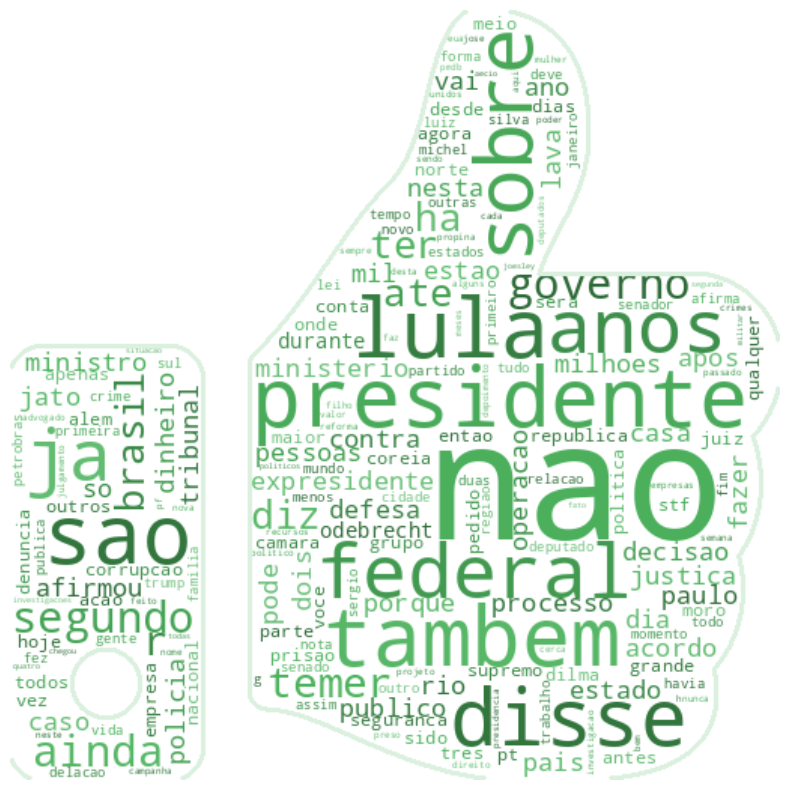

(<wordcloud.wordcloud.WordCloud at 0x7cd6c360aec0>, 69834)

In [47]:
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP


from funcoes_auxiliares import gerar_nuvem_palavras
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=true_words_dict,
                      arquivo_mascara='thumbs_up_mask.png')

##Gerando a nuvem dos dados falsos

In [ ]:
# Função para remover stopwords e pontuações
def preprocess_text(text):
    if isinstance(text, str):  # Verifique se é uma string
        stop_words = set(stopwords.words('portuguese'))
        punctuation = set(string.punctuation)
        tokens = word_tokenize(text)
        cleaned_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.lower() not in punctuation]
        return cleaned_tokens
    else:
        return []  # Retorna uma lista vazia se não for uma string

# Aplicar pré-processamento ao texto
fake_data['processed_text'] = fake_data['processed_text'].apply(preprocess_text)

# Inicializar um dicionário vazio para contar as ocorrências
fake_words_dict = {}

for index, row in fake_data.iterrows():
    for token in row['processed_text']:
        if token in fake_words_dict:
            fake_words_dict[token] += 1
        else:
            fake_words_dict[token] = 1

print(fake_words_dict)

In [ ]:
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP


from funcoes_auxiliares import gerar_nuvem_palavras
gerar_nuvem_palavras(dicionario_tokens_e_frequencia=fake_words_dict,
                      arquivo_mascara='thumbs_down_mask.png')